In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def G_1(x):
    if x[0] > 0:
        return 1
    else:
        return -1
    
def G_2(x):
    if x[1] > 4.75:
        return 1
    else:
        return -1
    
def G_3(x):
    if x[0] > 2:
        return 1
    else:
        return -1

In [3]:
training_set = np.array([[-3.5,4.5],[-1,-4.5],[-3,0.75],
                        [1,2],[1,7],[3,5],[6,6],[6,3]])
training_labels = np.array([-1,-1,-1,-1,1,1,1,1])

In [4]:
def G(x):
    return np.sign(np.log(7) * G_1(x) + np.log(13) * G_2(x) +
                  np.log(25) * G_3(x))

In [5]:
for x in training_set:
    print(G(x))

-1.0
-1.0
-1.0
-1.0
1.0
1.0
1.0
1.0


In [6]:
def plot_decision_boundary(data,labels,clf):
    plot_step = 0.02
    x_min, x_max = data[:,0].min() -1, data[:,0].max() + 1
    y_min,y_max = data[:,1].min() -1 , data[:,1].max() + 1

    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))
    Z = np.array([clf(z) for z in np.c_[xx.ravel(),yy.ravel()]])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z,cmap='cool')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

    plt.scatter(data[:,0],data[:,1],c=labels,cmap='hot',s=100)
    plt.show()

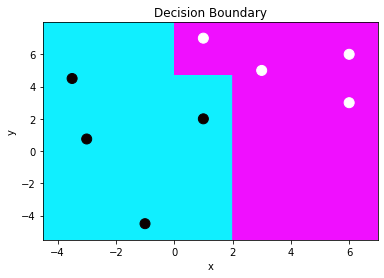

In [7]:
plot_decision_boundary(training_set,training_labels,G)

In [8]:
def optimal_split(data,labels):
    
    m = len(data)
    x_coord = np.array(data)[:,0]
    y_coord = np.array(data)[:,1]
    
    midpoints = [0.5 * (data[i][0] + data[j][0]) for i in 
                range(m) for j in range(i+1,m)],\
                [0.5 * (data[i][1] + data[j][1]) for i in range(m)
                    for j in range(i+1,m)]
    
    exclusive_midpoints = [x for x in midpoints[0] if x not in x_coord],\
                          [y for y in midpoints[1] if y not in y_coord]
    
    splits = [(0,exclusive_midpoints[0][i]) for i in range(len(exclusive_midpoints[0]))] +\
    [(1,exclusive_midpoints[1][i]) for i in range(len(exclusive_midpoints[1]))]
    
    split_indices = []
    
    for s in splits:
        if s[0] == 0:
            L = [labels[i] for i in range(m) if data[i][0] <= s[1]]
            R = [labels[i] for i in range(m) if data[i][0] > s[1]]
            
            if len(L) > 0 and len(R) > 0:
                g = len(L) * compute_gini(L) +\
                len(R) * compute_gini(R)
                split_indices.append((s,g/m))
        else:
            
            L = [labels[i] for i in range(m) if data[i][1] <= s[1]]
            R = [labels[i] for i in range(m) if data[i][1] > s[1]]
            
            if len(L) > 0 and len(R) > 0:
                g = len(L) * compute_gini(L) +\
                len(R) * compute_gini(R)
                split_indices.append((s,g/m)) 
                

                
    return sorted(split_indices,key = lambda x: x[1])